In [11]:
import cv2, numpy as np, matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio

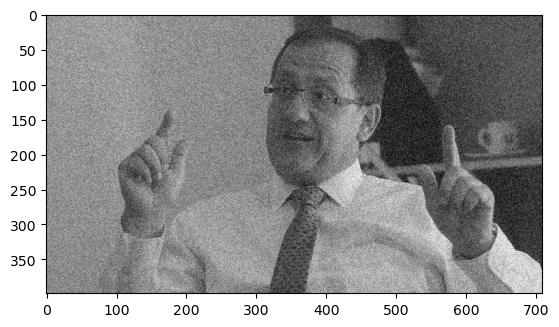

In [9]:
plt.set_cmap("gray")
img = cv2.imread("harol.jpg",0)
x, y = img.shape
ruido_uniforme = np.random.uniform(0, 100, size=(x, y))
imagen_ruido_uniforme = cv2.normalize( ruido_uniforme+img, None, 0, 256, cv2.NORM_MINMAX)

plt.imshow(imagen_ruido_uniforme)


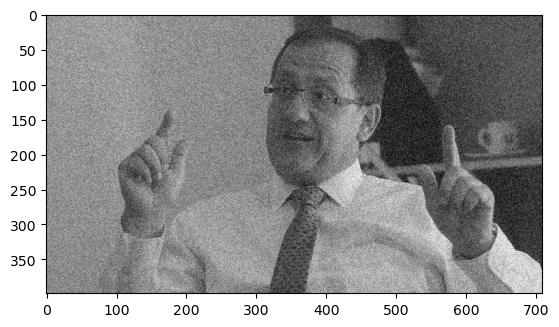

Text(0.5, 1.0, 'Wavelet Coif5')

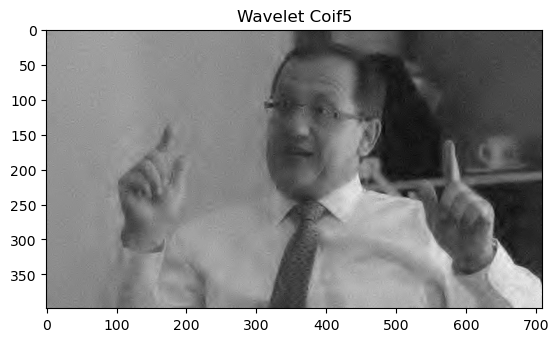

In [16]:

#estimacion señal/ruido medida en dB
sigma_est = estimate_sigma(imagen_ruido_uniforme,  average_sigmas=True)

# http://wavelets.pybytes.com/
img_visushrink_coif= denoise_wavelet(
    imagen_ruido_uniforme,
    method='VisuShrink',
    mode='soft',
    sigma = sigma_est/3,
    wavelet_levels = 8,
    wavelet='coif5',
    convert2ycbcr=False,
    rescale_sigma = True
    )

plt.imshow(imagen_ruido_uniforme)

plt.show()
plt.imshow(img_visushrink_coif, cmap='gray')
plt.title('Wavelet Coif5')